#Prediction of Petrol Consumption through Linear Regression using multiple variables
The description of this data helps us predict petrol consumption which depend upon various independent variables like petrol tx,highways,average income etc. The dataset was picked up from Kaggle.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Input all required libraries.

In [2]:
data = pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


input the dataset from the csv(excel) file. This shows the first 5 rows of the data.

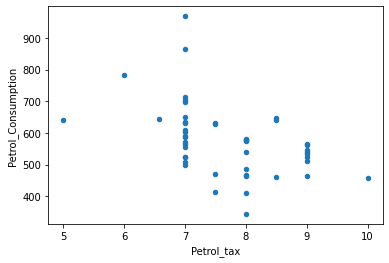

In [3]:
data.plot(kind='scatter', x='Petrol_tax',y='Petrol_Consumption')
plt.show()

cannot figure out much, hence no importance

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.

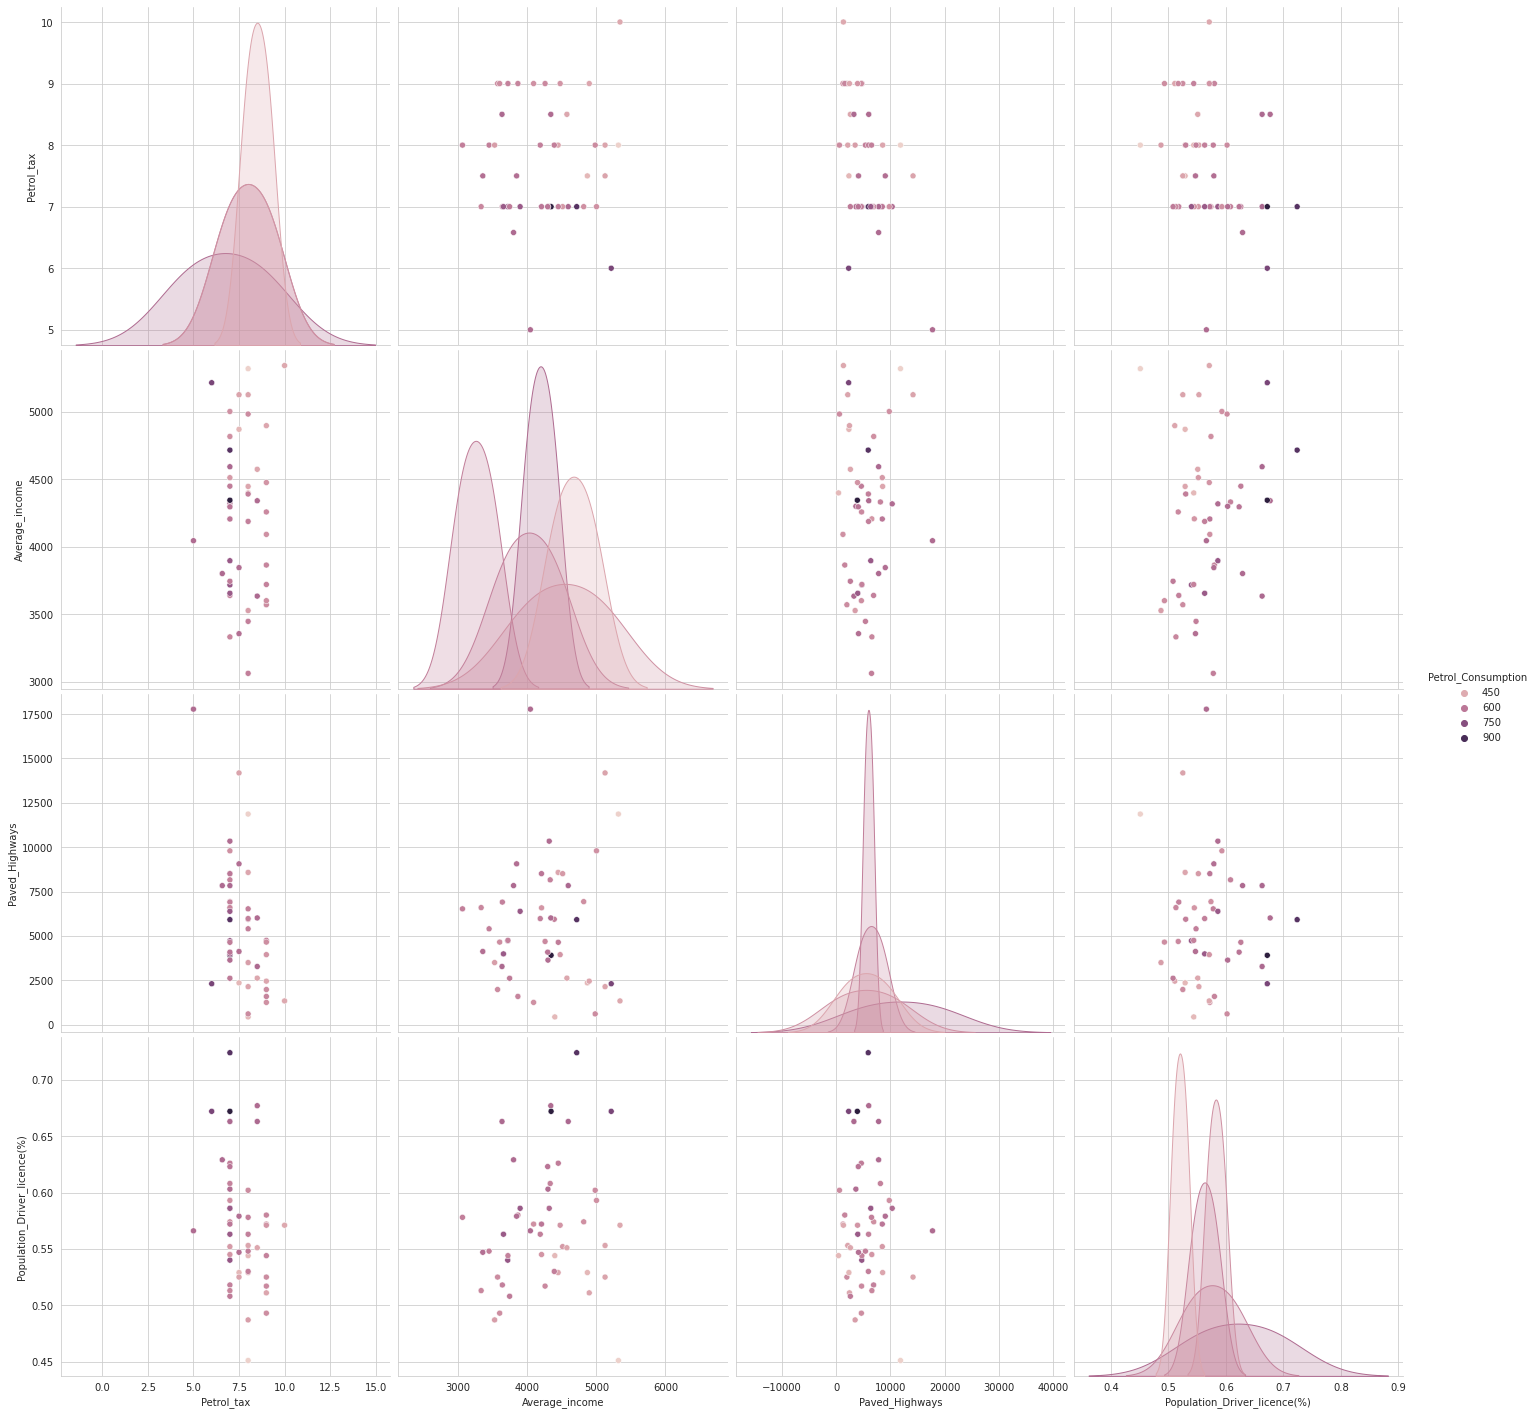

In [4]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Petrol_Consumption",size =5)
plt.show()

In [5]:
data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


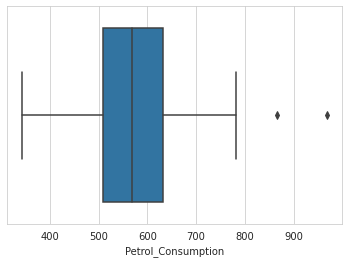

In [6]:
sns.boxplot(data['Petrol_Consumption'])

as, we found few outliers, we will have to remove them

In [7]:
def remove_outlier(df_in, col_name):
 q1 = df_in[col_name].quantile(0.25)
 q3 = df_in[col_name].quantile(0.75)
 iqr = q3-q1 #Interquartile range
 fence_low = q1-1.5*iqr
 fence_high = q3+1.5*iqr
 df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
 return df_out


In [8]:
data_outlier = remove_outlier(data,"Petrol_Consumption")
data_outlier = remove_outlier(data_outlier,"Petrol_tax")
data_outlier = remove_outlier(data_outlier,"Average_income")
data_outlier = remove_outlier(data_outlier,"Paved_Highways")
data_outlier = remove_outlier(data_outlier,"Population_Driver_licence(%)")



Removing these outliers will erase the redundant/false data from each series of this dataframe.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


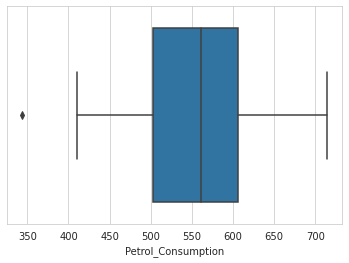

In [9]:
sns.boxplot(data_outlier['Petrol_Consumption'])

In [10]:
data.shape

(48, 5)

In [11]:
data_outlier.shape

(43, 5)

5 rows had to be dropped as they were outliers

In [12]:
X = data_outlier[['Average_income',
'Population_Driver_licence(%)','Petrol_tax']]
y = data_outlier['Petrol_Consumption']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


took 80% of the data into training mode and rest 20% for testing

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(regressor.intercept_)    
print(regressor.coef_)

525.2941980975535
[-8.24416770e-02  9.51920607e+02 -2.02754719e+01]


would have three variables meaning the plot would look 3-D.

In [16]:
y_pred = regressor.predict(X_test) 

In [17]:
df = pd.DataFrame({'Actual':y_test,'predicted':y_pred})

In [18]:
df

,Actual,predicted
32,577,660.781677
40,587,612.485174
29,534,515.239331
4,410,518.274296
10,580,505.606941
27,631,607.319501
30,571,576.373065
11,471,450.390441
41,699,617.890425


In [19]:
regressor.score(X, y)

0.6834927891537446

68% accuracy in our model using multiple independent variables.